In [48]:
from sklearn.datasets import load_files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import unicodedata
import underthesea

Load data

In [3]:
train_set = load_files(container_path="./data/train_set/", encoding="utf-8", decode_error="replace")
test_set = load_files(container_path="./data/test_set/", encoding="utf-8", decode_error="replace")
val_set = load_files(container_path="./data/val_set/", encoding="utf-8", decode_error="replace")

# Display data

Display the number of samples in each set

C:\Users\huynh\AppData\Local\Temp\ipykernel_19112\1884413543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sets, y=num_of_samples, palette="viridis")


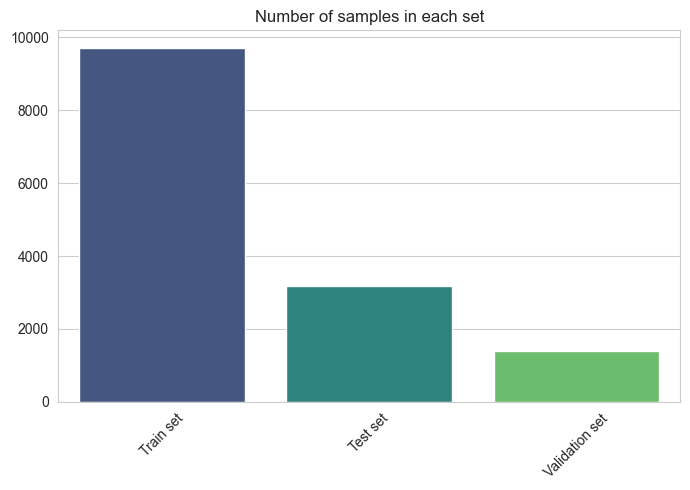

In [16]:
sets = ["Train set", "Test set", "Validation set"]
num_of_samples = [len(train_set["data"]), len(test_set["data"]), len(val_set["data"])]

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x=sets, y=num_of_samples, palette="viridis")
plt.title("Number of samples in each set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display number of samples per class in train set

C:\Users\huynh\AppData\Local\Temp\ipykernel_19112\2130666470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=num_of_samples, palette="viridis")


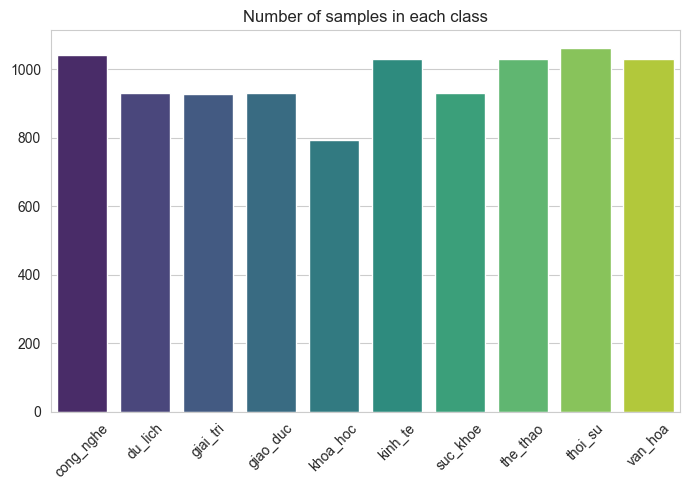

In [23]:
classes = train_set["target_names"]
temp, num_of_samples = np.unique(train_set["target"], return_counts=True)

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x=classes, y=num_of_samples, palette="viridis")
plt.title("Number of samples in each class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display number of samples per class in test set

C:\Users\huynh\AppData\Local\Temp\ipykernel_19112\2554704615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=num_of_samples, palette="viridis")


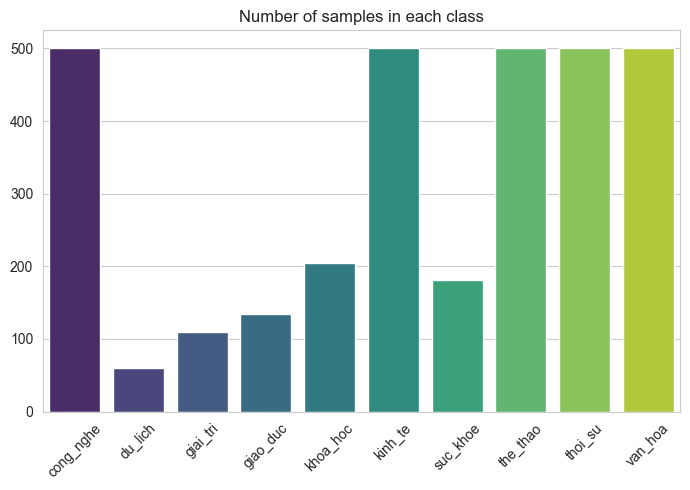

In [24]:
classes = test_set["target_names"]
temp, num_of_samples = np.unique(test_set["target"], return_counts=True)

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x=classes, y=num_of_samples, palette="viridis")
plt.title("Number of samples in each class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display number of samples per class in validation set

C:\Users\huynh\AppData\Local\Temp\ipykernel_19112\455480024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=num_of_samples, palette="viridis")


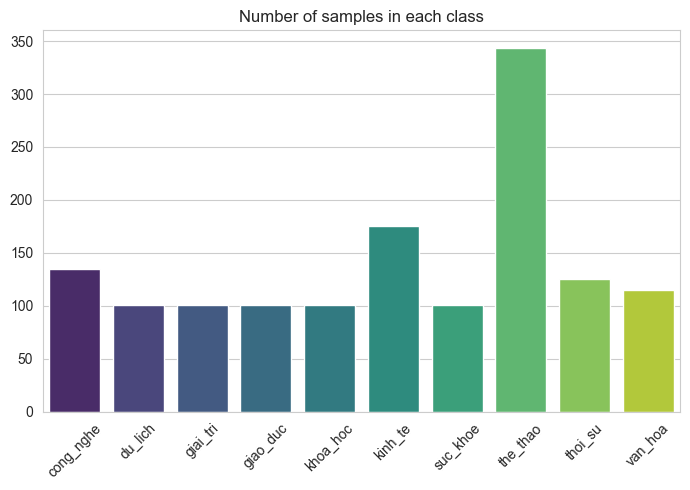

In [25]:
classes = val_set["target_names"]
temp, num_of_samples = np.unique(val_set["target"], return_counts=True)

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x=classes, y=num_of_samples, palette="viridis")
plt.title("Number of samples in each class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preprocessing data

Remove punctuations and numbers

In [46]:
def remove_punctuation_and_number(text):
    text = re.sub(r"[^a-zA-ZàáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ ]", " ", text)
    text = re.sub(r'\s+', " ", text)
    # text = text.replace("nlđo", "").strip(" ")
    # text = text.replace("NLĐO", "").strip(" ")
    return text.lower().strip()